In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.cluster.vq import kmeans, vq

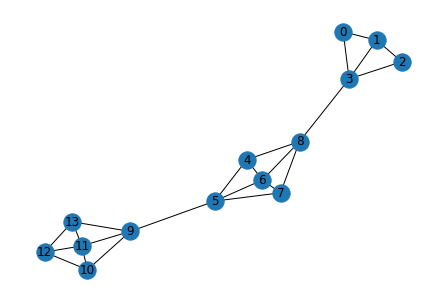

In [2]:
# Graph that will be used for clustering
# Can cleary see 3 clusters
G = nx.Graph()
G.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),
    (1, 3),
    
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 8), 
    (8, 4),
    (4, 6),
    (6, 8),
    (5, 7),
    
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 13),
    (13, 9),
    (9, 11),
    (10, 12),
    (11, 13),

    (3, 8),
    (5, 9) 
])
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos=pos, with_labels=True)

## Normalized spectral clustering (Shi and Malik)

In [109]:
# 1) compute unnormalized laplacian
# L = D - W 
W = nx.to_numpy_array(G)

diag = W.sum(axis=1)
D = np.diag(diag)

L = D - W

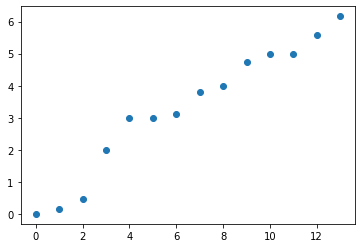

In [110]:
# Compute the first k generalized eigenvectors of the generalized eigenproblem
eigval, eigvec = np.linalg.eig(L)

# sort it
order = np.argsort(eigval)
eigval = eigval[order]
eigvec = eigvec[:, order]

if eigvec[0, 0] < 0:
        # This is not strictly needed, but makes comparing the different Laplacians easier
        eigvec *= -1

# plot it
plt.scatter(range(len(eigval)), eigval)

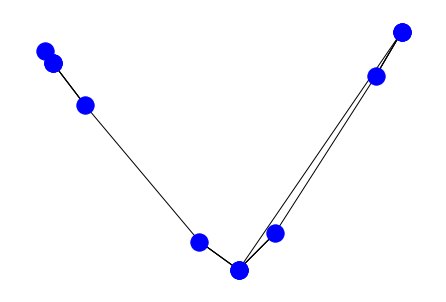

In [111]:
nx.draw(g, pos={n: (eigvec[v, 1], eigvec[v, 2]) for v, n in enumerate(G)}, node_color='b')

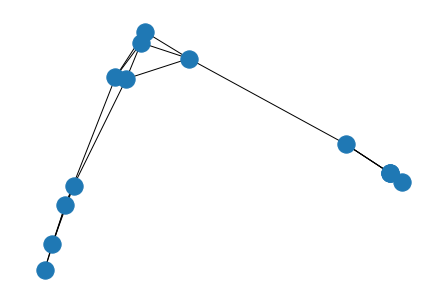

In [112]:
nx.draw_spectral(g)

[2 2 2 2 0 0 0 0 0 1 1 1 1 1]


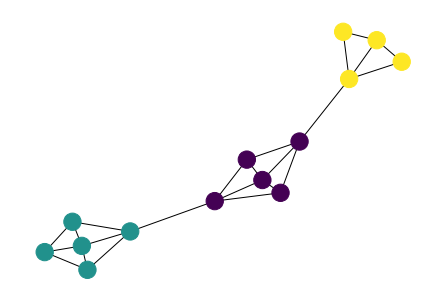

In [113]:
k = 3
obs = eigvec[:, 1:1+k]

centroids, dist = kmeans(obs, k)
labels, dist = vq(obs, centroids)
print(labels)
nx.draw(G, pos, node_color=labels)

## Normalized spectral clustering (Ng et al)

In [24]:
# 1) compute normalized laplacian Lsym
# L = D - W 
W = nx.to_numpy_array(G)

diag = W.sum(axis=1) 
D = np.diag(diag ** -0.5)

L = D - W

L_sym = D @ L @ D

In [25]:
eigval, eigvec = np.linalg.eig(L_sym)
# sort it
order = np.argsort(eigval)
eigval = eigval[order]
eigvec = eigvec[:, order]

In [26]:
eigvec.shape

(14, 14)

In [32]:
k = 3
k_eigvec = eigvec[:, 1:1+k]

In [33]:
k_eigvec

array([[ 0.51241248,  0.83378255,  0.20552401],
       [ 0.486996  ,  0.82021467,  0.30013797],
       [ 0.51241248,  0.83378255,  0.20552401],
       [ 0.60614655,  0.77043062, -0.19754245],
       [ 0.38546818, -0.46453984, -0.07778286],
       [ 0.21194417, -0.43635131,  0.87445823],
       [ 0.61516573, -0.76406439, -0.19436235],
       [ 0.38546818, -0.46453984, -0.07778286],
       [ 0.49951802, -0.24373334, -0.83130969],
       [-0.46110696,  0.05351385,  0.88572944],
       [-0.45321443,  0.15702623, -0.0956233 ],
       [-0.89924343,  0.32110654, -0.29707211],
       [-0.63604904,  0.25055744, -0.72983737],
       [-0.45321443,  0.15702623, -0.0956233 ]])

In [34]:
norm = np.sum(k_eigvec**2, axis=1)**0.5

for i in range(14):
    for j in range(3):
        k_eigvec[i, j] = k_eigvec[i, j] / norm[i]

In [35]:
k_eigvec

array([[ 0.51241248,  0.83378255,  0.20552401],
       [ 0.486996  ,  0.82021467,  0.30013797],
       [ 0.51241248,  0.83378255,  0.20552401],
       [ 0.60614655,  0.77043062, -0.19754245],
       [ 0.63333517, -0.76325216, -0.12779946],
       [ 0.21194417, -0.43635131,  0.87445823],
       [ 0.61516573, -0.76406439, -0.19436235],
       [ 0.63333517, -0.76325216, -0.12779946],
       [ 0.49951802, -0.24373334, -0.83130969],
       [-0.46110696,  0.05351385,  0.88572944],
       [-0.92665734,  0.32106107, -0.19551459],
       [-0.89924343,  0.32110654, -0.29707211],
       [-0.63604904,  0.25055744, -0.72983737],
       [-0.92665734,  0.32106107, -0.19551459]])

[0 0 0 0 2 2 2 2 2 1 1 1 1 1]


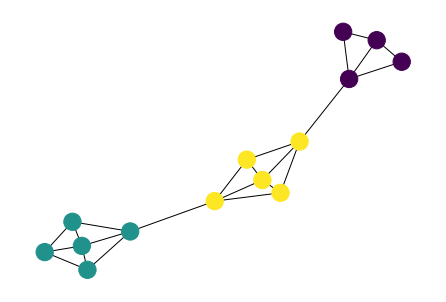

In [36]:
k = 3
obs = k_eigvec

centroids, dist = kmeans(obs, k)
labels, dist = vq(obs, centroids)
print(labels)
nx.draw(G, pos, node_color=labels)